<a href="https://colab.research.google.com/github/cryugesh01/Text-Embedding/blob/main/TEXT_EMBEDDING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
sentences=["The quick brown fox jumps over the lazy dog.",
        "Machine learning algorithms can significantly enhance data analysis.",
        "Deep learning is a subset of machine learning that focuses on neural networks.",
        "Natural language processing involves analyzing and understanding human language.",
        "Reading books can expand your knowledge and improve your imagination."]

TEXT PREPROCESSING

In [ ]:

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def preprocess(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    tokens = text.split()  # Tokenization
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words] #stopwords removal
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
sentence = [preprocess(sentence) for sentence in sentences]

In [ ]:
print(sentence[:2])

['quick brown fox jumps lazy dog', 'machine learning algorithms significantly enhance data analysis']


SIMILARITY MEASURES

**COSINE SIMILARITY**

In [ ]:
from math import sqrt, pow, exp
import numpy as np

def cos_similarity(x,y):
  similarity_matrix = np.dot(x, y.T)
  # Magnitudes of vectors in x and y
  x_magnitudes = np.sqrt(np.sum(x ** 2, axis=1, keepdims=True))
  y_magnitudes = np.sqrt(np.sum(y ** 2, axis=1, keepdims=True))
  cosine_sim_matrix = similarity_matrix / (x_magnitudes * y_magnitudes.T)

  return np.round(cosine_sim_matrix, 3)

**EUCLEDIAN DISTANCE**

In [ ]:
def euclidean_distance(vec1, vec2):
    return np.sqrt(np.sum((vec1 - vec2) ** 2))

def compute_pairwise_distances(vectors):
    num_vectors = len(vectors)
    distances = np.zeros((num_vectors, num_vectors))
    for i in range(num_vectors):
        for j in range(num_vectors):
            distances[i, j] = euclidean_distance(vectors[i], vectors[j])
    return distances

def distance_to_similarity(distances):
  return 1/exp(distances)




Cosine Similarity (TF-IDF):
[[0.36787944 1.         1.         1.         1.        ]
 [1.         0.36787944 0.8089647  1.         0.92960083]
 [1.         0.8089647  0.36787944 1.         1.        ]
 [1.         1.         1.         0.36787944 0.94270677]
 [1.         0.92960083 1.         0.94270677 0.36787944]]


TEXT EMBEDDING

**TF-IDF VECTORIZATION**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(sentence)

embedding_array = tfidf_matrix.toarray()

feature_names = vectorizer.get_feature_names_out()

embedding_array, feature_names

(array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.30151134, 0.        , 0.        , 0.        , 0.30151134,
         0.        , 0.        , 0.        , 0.30151134, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.30151134,
         0.        , 0.        , 0.30151134, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.30151134, 0.        , 0.30151134, 0.        , 0.        ,
         0.        , 0.        , 0.60302269, 0.        , 0.        ],
        [0.37924665, 0.37924665, 0.        , 0.        , 0.        ,
         0.        , 0.30597381, 0.37924665, 0.        , 0.        ,
         0.37924665, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.30597381, 0.30597381,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 

In [ ]:
#  cosine similarity
cosine_sim_tfidf = cos_similarity(tfidf_matrix, tfidf_matrix)

print("Cosine Similarity (TF-IDF):")
print(cosine_sim_tfidf)


Cosine Similarity (TF-IDF):
[[1.    0.    0.    0.    0.   ]
 [0.    1.    0.212 0.    0.073]
 [0.    0.212 1.    0.    0.   ]
 [0.    0.    0.    1.    0.059]
 [0.    0.073 0.    0.059 1.   ]]


In [ ]:
# Euclidean distance
euclidean_dist_tfidf= compute_pairwise_distances(embedding_array)
dist_tfidf=distance_to_similarity(euclidean_dist_tfidf)
print("Euclidean Distance (Bag of Words):\n", dist_tfidf)

Euclidean Distance (Bag of Words):
 [[1.         0.24311673 0.24311673 0.24311673 0.24311673]
 [0.24311673 1.         0.28486367 0.24311673 0.25632708]
 [0.24311673 0.28486367 1.         0.24311673 0.24311673]
 [0.24311673 0.24311673 0.24311673 1.         0.25369534]
 [0.24311673 0.25632708 0.24311673 0.25369534 1.        ]]


**BAG OF WORDS**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()

bow_matrix = count_vectorizer.fit_transform(sentence)

bow_array = bow_matrix.toarray()

bow_feature_names = count_vectorizer.get_feature_names_out()

bow_array, bow_feature_names

(array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0],
        [1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
         0, 2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2,
         0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2]]),
 array(['algorithms', 'analysis', 'analyzing', 'and', 'books', 'brown',
        'can', 'data', 'deep', 'dog', 'enhance', 'expand', 'focuses',
        'fox', 'human', 'imagination', 'improve', 'involves', 'is',
        'jumps', 'knowledge', 'language', 'lazy', 'learning', 'machine',
        'natural', '

In [ ]:
# cosine similarity
cosine_sim_bow = cos_similarity(bow_array, bow_array)

print("Cosine Similarity (BOW):")
print(cosine_sim_bow)


Cosine Similarity (BOW):
[[1.    0.    0.    0.    0.   ]
 [0.    1.    0.283 0.    0.102]
 [0.    0.283 1.    0.    0.   ]
 [0.    0.    0.    1.    0.087]
 [0.    0.102 0.    0.087 1.   ]]


In [ ]:
# Euclidean distances
euclidean_dist_bow = compute_pairwise_distances(bow_array)
dist_bow=distance_to_similarity(euclidean_dist_bow)
print("Euclidean Distance (Bag of Words):\n", dist_bow)

Euclidean Distance (Bag of Words):
 [[1.         0.01279247 0.00673795 0.00918287 0.00826412]
 [0.01279247 1.         0.01831564 0.01279247 0.0143696 ]
 [0.00673795 0.01831564 1.         0.00673795 0.00610273]
 [0.00918287 0.01279247 0.00673795 1.         0.01022852]
 [0.00826412 0.0143696  0.00610273 0.01022852 1.        ]]


CLUSTERING

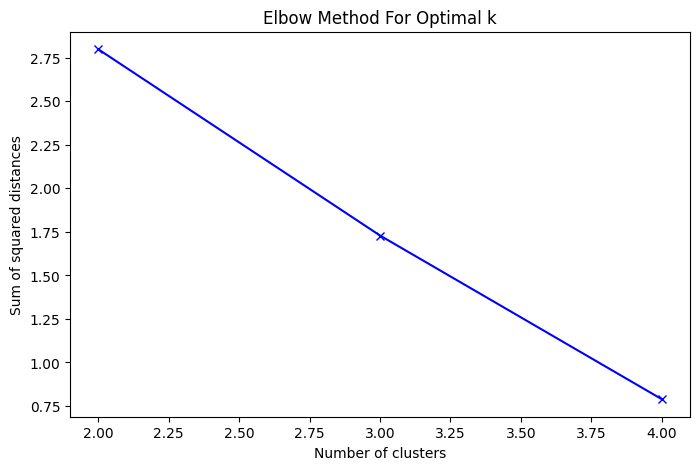

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
sum_of_squared_distances = []
K = range(2, 5)
for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(tfidf_matrix)
    sum_of_squared_distances.append(km.inertia_)

# Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# K-Means using TFIDF vectorized data
num_clusters =3
km = KMeans(n_clusters=num_clusters, random_state=0)
km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

for i, cluster in enumerate(clusters):
    print(f"Sentence {i + 1}: Cluster {cluster}")

Sentence 1: Cluster 0
Sentence 2: Cluster 1
Sentence 3: Cluster 1
Sentence 4: Cluster 2
Sentence 5: Cluster 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# Kmeans clustering using Bag of Words
num_clusters =3
km1 = KMeans(n_clusters=num_clusters, random_state=0)
km1.fit(bow_matrix)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

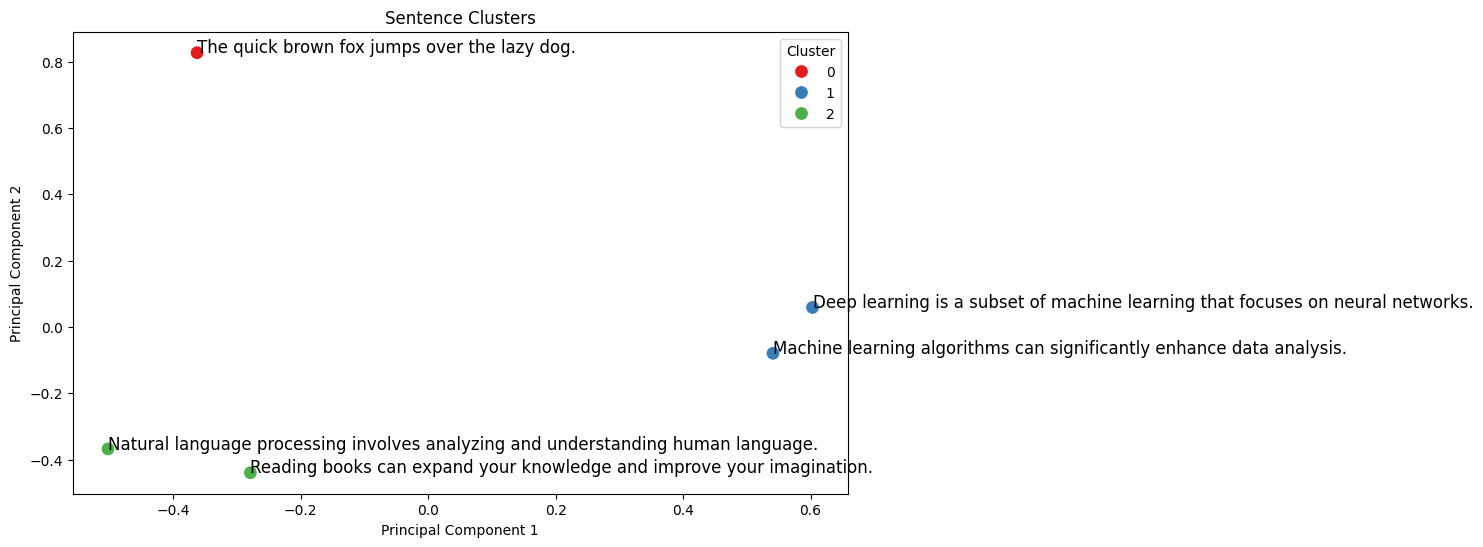

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(tfidf_matrix.toarray())

df = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])
df['Cluster'] = km.labels_
df['Sentence'] = sentences

sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100)
for i in range(len(df)):
    plt.text(df.PC1[i], df.PC2[i], df.Sentence[i], fontsize=12)

plt.title('Sentence Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
#  Silhouette Score
# Kmeans clustering using tfidf
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(tfidf_matrix.toarray(), km.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.04978519439322847


In [ ]:
# kmeans clustering for bag of words
silhouette_avg = silhouette_score(bow_matrix.toarray(), km1.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.06190614197609726


In [ ]:
import numpy as np
from scipy.spatial.distance import cdist

def dunn_index(X, labels):
    unique_labels = np.unique(labels)
    num_clusters = len(unique_labels)

    distances = cdist(X, X, 'euclidean')

    min_intercluster_distance = np.inf
    max_intracluster_distance = -np.inf

    for i in range(num_clusters):
        cluster_points = X[labels == i]

        if len(cluster_points) < 2:
            continue
        intra_dist = np.max(cdist(cluster_points, cluster_points, 'euclidean'))
        max_intracluster_distance = max(max_intracluster_distance, intra_dist)

        for j in range(num_clusters):
            if i == j:
                continue
            cluster_points_other = X[labels == j]
            inter_dist = np.min(cdist(cluster_points, cluster_points_other, 'euclidean'))
            min_intercluster_distance = min(min_intercluster_distance, inter_dist)

    if max_intracluster_distance == 0:
        return np.inf
    return min_intercluster_distance / max_intracluster_distance


# Dunn Index for tfidf clustered data
dunn_idx = dunn_index(tfidf_matrix.toarray(), km.labels_)
print(f'Dunn Index: {dunn_idx}')


Dunn Index: 0.9924759101681583


In [ ]:
# Dunn Index for tfidf clustered data
dunn_idx1 = dunn_index(bow_matrix.toarray(), km1.labels_)
print(f'Dunn Index: {dunn_idx1}')


Dunn Index: 0.9258200997725514


In [ ]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 13.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


WORD EMBEDDING

In [ ]:
import spacy
nlp = spacy.load('en_core_web_md')
docs = [nlp(sentences) for sentences in sentence]

In [ ]:

print(docs[0].vector)

[ 1.7418337e-01  2.0860066e+00 -2.2932465e+00 -2.3454340e+00
  3.0382168e-01  7.6266646e-02 -1.4214392e+00  7.6372337e-01
  3.2293398e-03  1.0319438e+00  3.9076252e+00  2.1582367e+00
 -8.7099379e-01  9.9856830e-01  3.8357668e+00 -3.3570316e+00
  1.1317908e+00 -3.3811834e-01  1.1531049e+00 -1.1066186e+00
 -1.1549350e+00  1.6473466e+00  7.6564330e-01 -3.5395832e+00
  8.5899901e-01  1.0541335e-01 -2.9896049e+00 -2.8757843e-01
  8.4233366e-02  1.8023667e+00 -2.1570814e+00 -6.4213163e-01
 -1.5558003e-01  2.1623164e-01  6.4353174e-01 -2.2638133e+00
  1.2783300e+00  1.9363699e+00  3.6432333e+00 -1.4537483e+00
  5.1701665e-01 -1.2275300e+00  3.3563519e+00 -7.2256833e-01
 -1.9450332e-01 -2.1457350e-02  2.3205068e+00 -2.4383166e+00
 -2.0599349e+00  5.7130504e-01  2.1223934e+00  4.0456867e+00
  1.1524500e+00  1.7001549e+00 -1.7257484e+00 -4.4362172e-01
  1.1681815e+00  1.0830165e+00  2.1129067e+00  8.1707209e-01
  1.1229988e+00 -3.2530098e+00 -5.1163000e-01  1.3671750e+00
 -1.7335051e+00 -1.92899

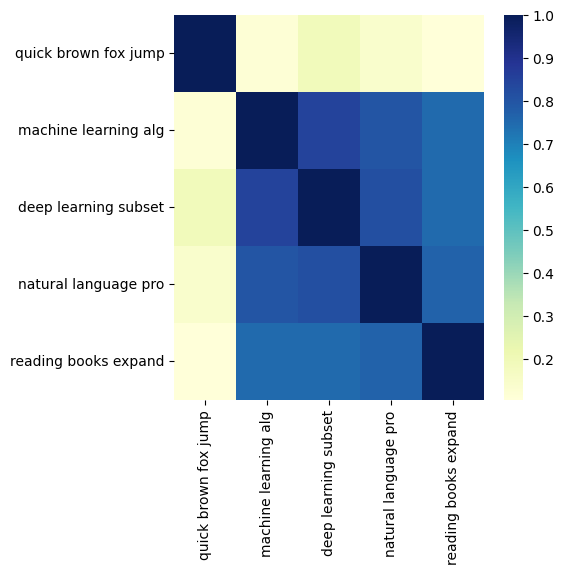

In [ ]:
labels = [headline[:20] for headline in sentence]
def create_heatmap(similarity, cmap = "YlGnBu"):
  df = pd.DataFrame(similarity)
  df.columns = labels
  df.index = labels
  fig, ax = plt.subplots(figsize=(5,5))
  sns.heatmap(df, cmap=cmap)
similarity = []
for i in range(len(docs)):
    row = []
    for j in range(len(docs)):
      row.append(docs[i].similarity(docs[j]))
    similarity.append(row)
create_heatmap(similarity)